In [1]:
import pandas as pd

In [2]:
df_hotels = pd.read_csv('hotels_info_coord.csv').drop(columns=['Unnamed: 0'])
df_dostoprim = pd.read_csv('dostoprim_info_coord.csv').drop(columns=['Unnamed: 0'])

# Проверка на дубликаты
df_hotels.drop_duplicates(inplace=True)
df_dostoprim.drop_duplicates(inplace=True)

In [3]:
# df_hotels.head(2)
df_dostoprim.head(2)

,id,Адрес,Название достопримечательности,Общая оценка,Кол-во отзывов,Тип достопримечательности,Достопримечательность,adress_for_scrap,Широта,Долгота
0,0,"Alemdar Mahallesi, Yerebatan Caddesi, No:1/3, ...",Цистерна Базилика,4.5,32299 отзывов,Исторические достопримечательности,1. Цистерна Базилика,"Цистерна Базилика, Istanbul, Turkiye",NaN,NaN
1,1,"Sultan Ahmet, Ayasofya Meydanı No:1, Стамбул 3...",Hagia Sophia Moschee,4.5,45396 отзывов,Исторические достопримечательности,2. Hagia Sophia Moschee,"Hagia Sophia Moschee, Istanbul, Turkiye",41.008505,28.980011


In [4]:
# Очистка данных в df_hotels ('4,5 кружков' -> 4.5, str->float)
def clean_rating(rating):
    if isinstance(rating, str):
        try:
            return float(rating.split(' ')[0].replace(',', '.'))
        except:
            return None
    return rating

rating_columns = ['Общая оценка', 'Кол-во отзывов', 'Расположение', 'Номера', 'Цена/качество', 'Чистота', 'Обслуживание']
for col in rating_columns:
    df_hotels[col] = df_hotels[col].apply(clean_rating)

# Очистка данных в df_dostoprim
df_dostoprim['Кол-во отзывов'] = df_dostoprim['Кол-во отзывов'].apply(clean_rating)


In [5]:
# [x1, x2,x3, ..., xn] -> x1, x2, x3, ..., xn, str->str
df_hotels['Услуги и удобства в отеле'] = df_hotels['Услуги и удобства в отеле'].str.replace(r"[\[\]']", '', regex=True).str.strip()
df_hotels['СТИЛЬ ОТЕЛЯ'] = df_hotels['СТИЛЬ ОТЕЛЯ'].str.replace(r"[\[\]']", '', regex=True).str.strip()
df_hotels['Языки, используемые в общении'] = df_hotels['Языки, используемые в общении'].str.replace(r"[\[\]']", '', regex=True).str.strip()
df_hotels['Оснащенность номера'] = df_hotels['Оснащенность номера'].str.replace(r"[\[\]']", '', regex=True).str.strip()
df_hotels['Типы номеров'] = df_hotels['Типы номеров'].str.replace(r"[\[\]']", '', regex=True).str.strip()

In [6]:
# Удаление цифр и фразы "и еще"
df_hotels['Языки, используемые в общении']= df_hotels['Языки, используемые в общении'].str.replace(r'\d+', '', regex=True)  # Удаление цифр
df_hotels['Языки, используемые в общении'] = df_hotels['Языки, используемые в общении'].str.replace(r'и еще ', '', regex=True)  # Удаление фразы "и еще "
# Удаление лишних пробелов
df_hotels['Языки, используемые в общении']  = df_hotels['Языки, используемые в общении'] .str.strip().str.replace(r'\s+', ' ', regex=True)

In [7]:
# Нормализация столбца с услугами
def create_normilize_df(df, col_name_to_norm:str):
    services = df[col_name_to_norm].str.get_dummies(sep=', ')
    services.insert(0, 'Название отеля en', df['Название отеля en'])
    services.insert(0, 'id', df['id'])

    return services

# Создание нормализованных датафреймов для некоторых столбцов (для возможного дальнейшего анализа)
services = create_normilize_df(df_hotels, 'Услуги и удобства в отеле')
styles = create_normilize_df(df_hotels, 'СТИЛЬ ОТЕЛЯ')
languages = create_normilize_df(df_hotels, 'Языки, используемые в общении')
roomequipment = create_normilize_df(df_hotels, 'Оснащенность номера')
roomtype = create_normilize_df(df_hotels, 'Типы номеров')

In [8]:
# 4 Предобработка данных

In [9]:
# Таблица отелей  - проверка на пропуски
print(df_hotels.isnull().sum())

id                                 0
Адрес                              0
Название отеля en                  0
Общая оценка                       0
Кол-во отзывов                     0
Расположение                       0
Номера                             4
Цена/качество                      2
Чистота                            2
Обслуживание                       0
Класс отеля                       98
СТИЛЬ ОТЕЛЯ                      285
Языки, используемые в общении     68
Услуги и удобства в отеле          0
Оснащенность номера                0
Типы номеров                       0
Название_отеля                     0
Качество сна                     895
adress_for_scrap                   0
Широта                           388
Долгота                          388
dtype: int64


In [10]:
df_hotels = df_hotels.drop('Качество сна', axis=1)

In [11]:
# Таблица достопримемчательностей - проверка на пропуски
print(df_dostoprim.isnull().sum())

id                                  0
Адрес                              91
Название достопримечательности      0
Общая оценка                      139
Кол-во отзывов                    138
Тип достопримечательности           1
Достопримечательность               0
adress_for_scrap                    0
Широта                            350
Долгота                           350
dtype: int64


In [12]:
# Размерность датафрейма
print(df_hotels.shape)
print(df_dostoprim.shape)

(900, 20)
(674, 10)


In [13]:
# Удаляем строки без оценок для анализа
df_hotels.dropna(subset=['Общая оценка'], inplace=True)
df_dostoprim.dropna(subset=['Общая оценка'], inplace=True)
# print(df_hotels.isnull().sum())
print(df_dostoprim.isnull().sum())

id                                  0
Адрес                              68
Название достопримечательности      0
Общая оценка                        0
Кол-во отзывов                      0
Тип достопримечательности           0
Достопримечательность               0
adress_for_scrap                    0
Широта                            257
Долгота                           257
dtype: int64


In [14]:
df_dostoprim.head()

,id,Адрес,Название достопримечательности,Общая оценка,Кол-во отзывов,Тип достопримечательности,Достопримечательность,adress_for_scrap,Широта,Долгота
0,0,"Alemdar Mahallesi, Yerebatan Caddesi, No:1/3, ...",Цистерна Базилика,4.5,32299.0,Исторические достопримечательности,1. Цистерна Базилика,"Цистерна Базилика, Istanbul, Turkiye",NaN,NaN
1,1,"Sultan Ahmet, Ayasofya Meydanı No:1, Стамбул 3...",Hagia Sophia Moschee,4.5,45396.0,Исторические достопримечательности,2. Hagia Sophia Moschee,"Hagia Sophia Moschee, Istanbul, Turkiye",41.008505,28.980011
2,2,"Bereketzade, Стамбул 34421 Турция",Галатская башня,4.5,10122.0,Исторические достопримечательности,3. Галатская башня,"Галатская башня, Istanbul, Turkiye",41.025641,28.974213
3,3,Подробнее,Historic Areas of Istanbul,5.0,10719.0,Исторические достопримечательности,4. Historic Areas of Istanbul,"Historic Areas of Istanbul, Istanbul, Turkiye",NaN,NaN
4,4,"Eyüp Merkez, Стамбул 34050 Турция",Мечеть Эйюп Султан,4.5,1874.0,Исторические достопримечательности,5. Мечеть Эйюп Султан,"Мечеть Эйюп Султан, Istanbul, Turkiye",41.047407,28.935614


In [15]:
# Анализ, оценка возможных зависимостей

In [16]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/ln/8qg4pnzx6b73bt0vg7fl4x780000gn/T/ipykernel_50199/3050635027.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_ratings.sort_values(by='Кол-во отзывов'), x='Тип достопримечательности', y='Кол-во отзывов', palette='viridis')


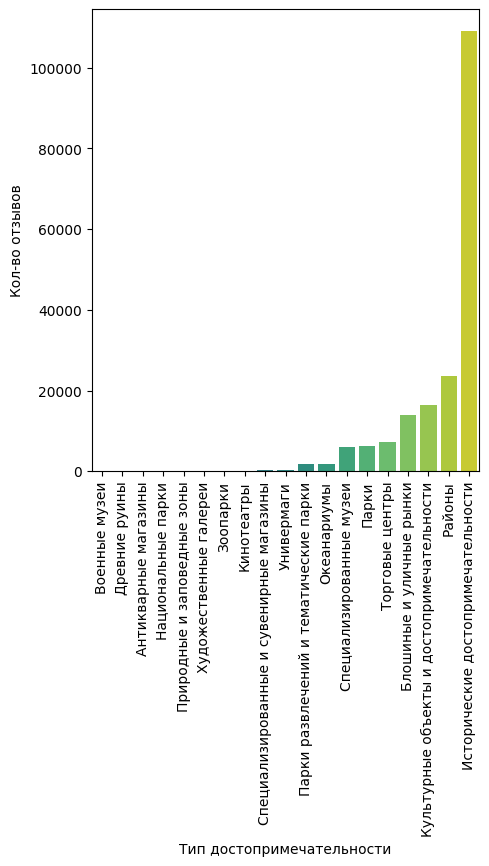

In [17]:
# Группировка данных по типу и вычисление средней оценки
average_ratings = df_dostoprim.groupby('Тип достопримечательности', as_index=False)['Кол-во отзывов'].sum()

plt.figure(figsize=(5, 6))
sns.barplot(data=average_ratings.sort_values(by='Кол-во отзывов'), x='Тип достопримечательности', y='Кол-во отзывов', palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [18]:
# Создание датафрейма с кол-вом встречаемых типов достопримечательностей и их суммарным кол-вом отзывов для дальнейшей нормировки и анализа зависмости
df_group = df_dostoprim.groupby('Тип достопримечательности').agg(
    Количество=('Тип достопримечательности', 'size'),
    Суммарное_количество_отзывов=('Кол-во отзывов', 'sum')
).reset_index()
df_group

,Тип достопримечательности,Количество,Суммарное_количество_отзывов
0,Антикварные магазины,1,12.0
1,Блошиные и уличные рынки,21,13961.0
2,Военные музеи,1,1.0
3,Древние руины,2,5.0
4,Зоопарки,4,127.0
5,Исторические достопримечательности,129,108998.0
6,Кинотеатры,1,163.0
7,Культурные объекты и достопримечательности,80,16442.0
8,Национальные парки,1,27.0
9,Океанариумы,3,1938.0


/var/folders/ln/8qg4pnzx6b73bt0vg7fl4x780000gn/T/ipykernel_50199/3894714846.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_group, x='Тип достопримечательности', y='Нормированное количество отзывов', palette='viridis')


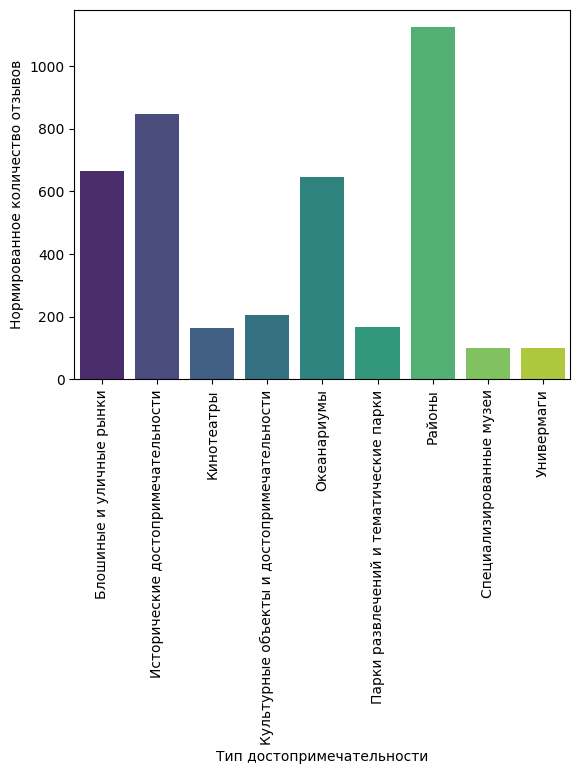

In [19]:
# График для определения популярных типов достопримечательностей для туристов
# Нормируем данные
# Нормируем в соотношении суммарных кол-во отзывов на кол-во достопримечательностей каждого типа
df_group['Нормированное количество отзывов'] = df_group['Суммарное_количество_отзывов']/ df_group['Количество'] 
df_group = df_group[df_group['Нормированное количество отзывов']>df_group['Нормированное количество отзывов'].quantile()]
# df_group['Нормированное количество отзывов'] = df_group['Суммарное_количество_отзывов'] / df_group['Суммарное_количество_отзывов'].max()
sns.barplot(data=df_group, x='Тип достопримечательности', y='Нормированное количество отзывов', palette='viridis')
plt.xticks(rotation=90)
plt.show()

Исследование влияния стиля отеля на его "популярность"

In [20]:
# Расчет кол-ва встречаемости стиля отеля в данных
styles_sum = styles.sum()[2:]
df_styles = styles_sum.reset_index()
df_styles.columns = ['Стиль', 'Популярность']

/var/folders/ln/8qg4pnzx6b73bt0vg7fl4x780000gn/T/ipykernel_50199/234664436.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_styles, x='Стиль', y='Популярность', palette='viridis')


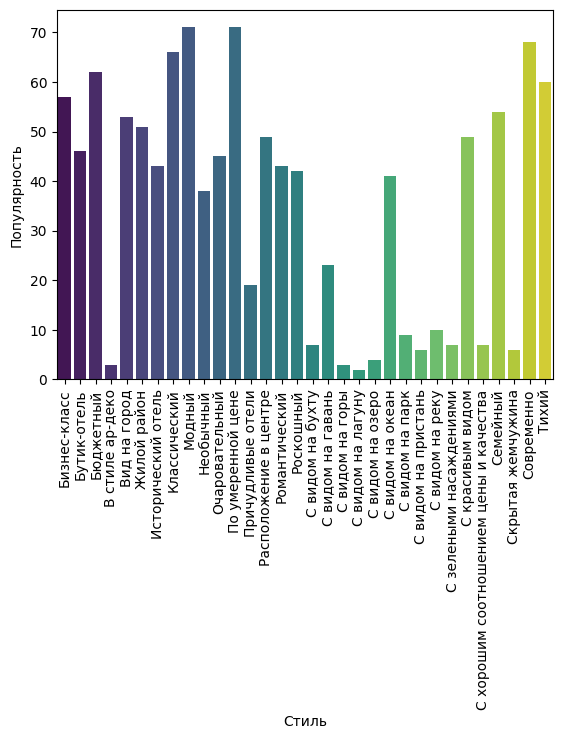

In [21]:
sns.barplot(data=df_styles, x='Стиль', y='Популярность', palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [22]:
# Нормировка "популярности"  стиля отеля в виде частоты встречаемости для корректного анализа
df_styles['Популярность_Norm'] = (df_styles['Популярность']-df_styles['Популярность'].min())/(df_styles['Популярность'].max()-df_styles['Популярность'].min())

In [23]:
# Увеличение таблицы с данными по отелям в рез-те разделения на отдельный стиль (т.к. стиль отеля мог представлять перечисление)
df_hotels1 = df_hotels.copy()
df_hotels1['СТИЛЬ ОТЕЛЯ'] = df_hotels1['СТИЛЬ ОТЕЛЯ'].str.split(', ')
df_hotels_exploded = df_hotels1.explode('СТИЛЬ ОТЕЛЯ')
# df_hotels_exploded.shape

# Группировка стиля отеля со средним значением кол-ва отзывов
avg_reviews = df_hotels_exploded.groupby('СТИЛЬ ОТЕЛЯ')['Кол-во отзывов'].mean().reset_index()
df_hotels_exploded.shape

(1400, 20)

In [24]:
# Нормировка "популярности" стиля отеля в виде кол-ва отзывов  для корректного анализа
avg_reviews['Кол-во отзывов_Norm'] = (avg_reviews['Кол-во отзывов']-avg_reviews['Кол-во отзывов'].min())/(avg_reviews['Кол-во отзывов'].max()-avg_reviews['Кол-во отзывов'].min())
avg_reviews.rename(columns={'СТИЛЬ ОТЕЛЯ': 'Стиль'}, inplace=True)

# Общий датафрейм Стиля и данных по кол-ву отзывов и встречаемости
df_styles_merge = df_styles.merge(avg_reviews, on='Стиль')

In [25]:
# Сортировка для удобства анализа на графике
# df_styles_merge = df_styles_merge.sort_values(by='Кол-во отзывов_Norm')
df_styles_merge = df_styles_merge.sort_values(by='Популярность_Norm')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


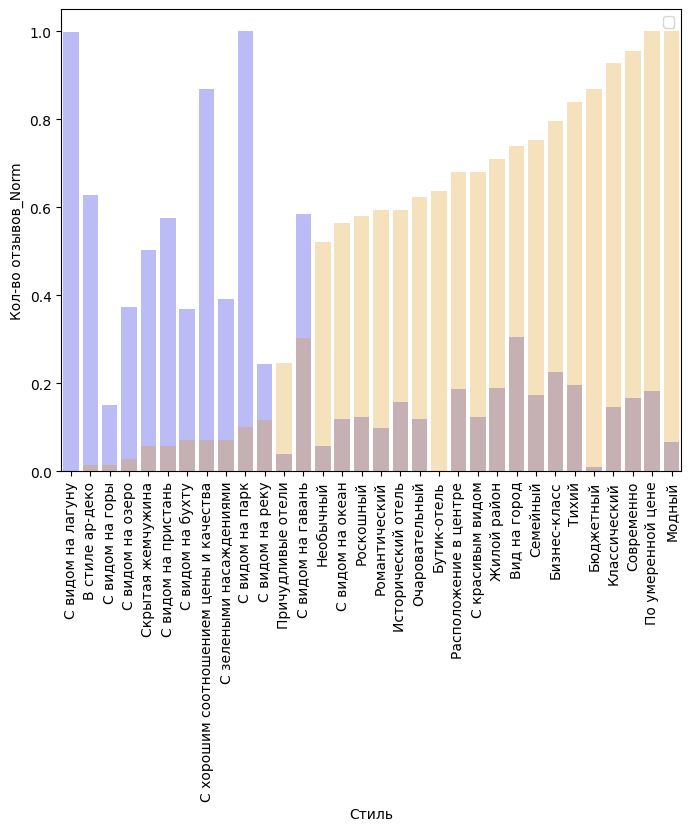

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(data=df_styles_merge, x='Стиль', y='Кол-во отзывов_Norm', color='blue', fill=True, alpha=0.3)
# plt.xticks(rotation=90)
sns.barplot(data=df_styles_merge, x='Стиль', y='Популярность_Norm', color='orange', fill=True, alpha=0.3)
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [27]:
df_styles_merge.to_csv('df_styles_toDB.csv')

In [28]:
df_hotels_exploded

,id,Адрес,Название отеля en,Общая оценка,Кол-во отзывов,Расположение,Номера,Цена/качество,Чистота,Обслуживание,Класс отеля,СТИЛЬ ОТЕЛЯ,"Языки, используемые в общении",Услуги и удобства в отеле,Оснащенность номера,Типы номеров,Название_отеля,adress_for_scrap,Широта,Долгота
0,0,"Hudavendigar Cd. No:5, Стамбул 34110 Турция",Romance Istanbul Hotel,5.0,5163.0,5.0,4.9,4.9,4.9,5.0,"4,0 из 5 звезд",Романтический,"Русский, Английский, Турецкий","Парковка, Бесплатный WiFi, Фитнес-центр, Бассе...","Гипоаллергенный номер, Звукоизоляция номеров, ...","Люкс для новобрачных, Номера для некурящих, Но...",1. Romance Istanbul Hotel,"Romance Istanbul Hotel, Istanbul, Turkiye",41.012661,28.977981
0,0,"Hudavendigar Cd. No:5, Стамбул 34110 Турция",Romance Istanbul Hotel,5.0,5163.0,5.0,4.9,4.9,4.9,5.0,"4,0 из 5 звезд",Очаровательный,"Русский, Английский, Турецкий","Парковка, Бесплатный WiFi, Фитнес-центр, Бассе...","Гипоаллергенный номер, Звукоизоляция номеров, ...","Люкс для новобрачных, Номера для некурящих, Но...",1. Romance Istanbul Hotel,"Romance Istanbul Hotel, Istanbul, Turkiye",41.012661,28.977981
1,1,"Saray Cd No: 5, Стамбул 34353 Турция",Conrad Istanbul Bosphorus,5.0,9369.0,4.5,4.5,4.4,4.7,4.7,"5,0 из 5 звезд",Вид на город,"Английский, Французский, Арабский, Немецкий","Услуга парковки автомобиля сотрудником отеля, ...","Гипоаллергенный номер, Шторы, блокирующие свет...","С видом на океан, С видом на город, Вид на кул...",2. Конрад Стамбул,"Conrad Istanbul Bosphorus, Istanbul, Turkiye",41.047134,29.009458
1,1,"Saray Cd No: 5, Стамбул 34353 Турция",Conrad Istanbul Bosphorus,5.0,9369.0,4.5,4.5,4.4,4.7,4.7,"5,0 из 5 звезд",С видом на гавань,"Английский, Французский, Арабский, Немецкий","Услуга парковки автомобиля сотрудником отеля, ...","Гипоаллергенный номер, Шторы, блокирующие свет...","С видом на океан, С видом на город, Вид на кул...",2. Конрад Стамбул,"Conrad Istanbul Bosphorus, Istanbul, Turkiye",41.047134,29.009458
2,2,"Silahsor Cad. No 42, Стамбул 34381 Турция",Hilton Istanbul Bomonti Hotel & Conference Center,5.0,8565.0,4.3,4.8,4.6,4.8,4.7,"5,0 из 5 звезд",Бизнес-класс,"Русский, Английский, Французский, Испанский","Услуга парковки автомобиля сотрудником отеля, ...","Гипоаллергенный номер, Шторы, блокирующие свет...","С видом на город, Люкс для новобрачных, Номера...",3. Хилтон Стамбул Бомонти Отель & Конференц-центр,Hilton Istanbul Bomonti Hotel & Conference Cen...,41.058787,28.979365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,896,"Dolapdere Taksim Caddesi, Cambazoğlu Sk. No:6,...",Ten Rooms Istanbul,4.5,56.0,4.8,4.8,4.8,4.8,4.6,"3,0 из 5 звезд",Современно,"Русский, Английский, Французский, Испанский","Платная частная парковка поблизости, Бесплатны...","Шторы, блокирующие свет, Звукоизоляция номеров...","С видом на город, Номера для некурящих, Номера...",897. Ten Rooms Istanbul,"Ten Rooms Istanbul, Istanbul, Turkiye",NaN,NaN
897,897,"Mehmet Akif Mah. 3.İnonu Cad. No:96, Kucukcekm...",Ramada Encore Basin Express,4.5,35.0,4.3,4.7,4.8,4.5,4.8,NaN,NaN,"Английский, Турецкий","Бесплатная парковка, Бесплатный WiFi, Фитнес-ц...","Шторы, блокирующие свет, Звукоизоляция номеров...","С видом на город, Люкс для новобрачных, Номера...",898. Ramada Encore Basin Express,"Ramada Encore Basin Express, Istanbul, Turkiye",NaN,NaN
898,898,"Kemankeş Mahallesi, Maliye Caddesi, Demirciler...",Morione Hotel & Spa Center,4.5,153.0,4.6,4.4,3.9,4.6,4.3,"4,0 из 5 звезд",NaN,Турецкий,"Бесплатная частная парковка поблизости, Беспла...","Кондиционер, Письменный стол, Уборка номеров, ...","С видом на город, Люкс для новобрачных, Номера...",899. Morione Hotel & Spa Center,"Morione Hotel & Spa Center, Istanbul, Turkiye",NaN,NaN
899,899,"Dizdariye Cesme Sok. No:49 Binbirdirek Mah., С...",Blue Istanbul Hotel,4.0,502.0,4.4,4.1,4.3,4.4,4.0,"3,0 из 5 звезд",Тихий,"Русский, Английский, Французский, Арабский","Услуга парковки автомобиля сотрудником отеля, ...","Шторы, блокирующие свет, Сейф, Телефон, Утюг, ...",,900. Блю Стамбул О

<Axes: xlabel='Общая оценка', ylabel='Count'>

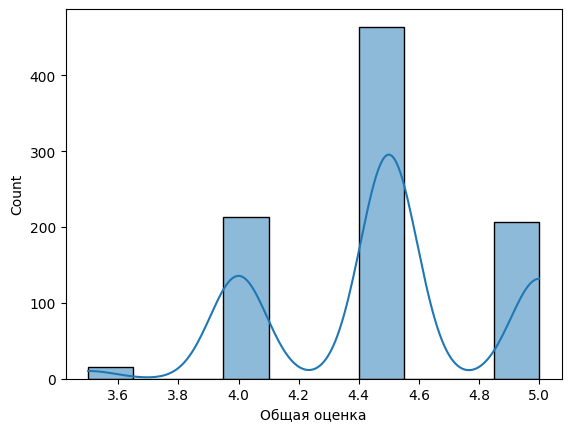

In [29]:
sns.histplot(df_hotels['Общая оценка'], bins=10, kde=True)

In [30]:
def quality_metrics(df):
    completeness = df.notnull().mean()*100
    consistency = df.apply(lambda x: x.nunique()/len(x)*100)

    return pd.DataFrame({'Процент пропущенных значений: ': completeness, 'Процент уникальных значений': consistency})

hotel_quality = quality_metrics(df_hotels)

In [31]:
hotel_quality

,Процент пропущенных значений:,Процент уникальных значений
id,100.000000,100.000000
Адрес,100.000000,80.222222
Название отеля en,100.000000,80.333333
Общая оценка,100.000000,0.444444
Кол-во отзывов,100.000000,55.555556
Расположение,100.000000,2.333333
Номера,99.555556,2.888889
Цена/качество,99.777778,2.222222
Чистота,99.777778,2.444444
Обслуживание,100.000000,2.222222


In [46]:
df_dostoprim_location

,id,Адрес,Название достопримечательности,Общая оценка,Кол-во отзывов,Тип достопримечательности,Достопримечательность,adress_for_scrap,Широта,Долгота
1,1,"Sultan Ahmet, Ayasofya Meydanı No:1, Стамбул 3...",Hagia Sophia Moschee,4.5,45396.0,Исторические достопримечательности,2. Hagia Sophia Moschee,"Hagia Sophia Moschee, Istanbul, Turkiye",41.008505,28.980011
2,2,"Bereketzade, Стамбул 34421 Турция",Галатская башня,4.5,10122.0,Исторические достопримечательности,3. Галатская башня,"Галатская башня, Istanbul, Turkiye",41.025641,28.974213
4,4,"Eyüp Merkez, Стамбул 34050 Турция",Мечеть Эйюп Султан,4.5,1874.0,Исторические достопримечательности,5. Мечеть Эйюп Султан,"Мечеть Эйюп Султан, Istanbul, Turkiye",41.047407,28.935614
5,5,"Yahyakemal Cad. No.28, Стамбул 34470 Турция",Rumeli Fortress,4.5,914.0,Исторические достопримечательности,6. Rumeli Fortress,"Rumeli Fortress, Istanbul, Turkiye",41.084917,29.056713
6,6,"Uskudar, Стамбул 34668 Турция",Kız Kulesi,4.5,1119.0,Исторические достопримечательности,7. Kız Kulesi,"Kız Kulesi, Istanbul, Turkiye",41.021138,29.004058
...,...,...,...,...,...,...,...,...,...,...
645,645,"Mimar Kemalettin Ordu Caddesi Fatih, Стамбул 3...",Istanbul Universitesi Ridvan Celikel Arkeoloji...,4.5,2.0,Специализированные музеи,54. Istanbul Universitesi Ridvan Celikel Arkeo...,Istanbul Universitesi Ridvan Celikel Arkeoloji...,41.009856,28.960116
649,649,Подробнее,Basin Museum,3.5,8.0,Специализированные музеи,58. Basin Museum,"Basin Museum, Istanbul, Turkiye",41.008562,28.972216
650,650,NaN,Osmanlı Bankası Müzesi,4.0,1.0,Специализированные музеи,59. Osmanlı Bankası Müzesi,"Osmanlı Bankası Müzesi, Istanbul, Turkiye",41.023836,28.973617
670,670,"Cami Mh., Balikcilar Sk. U Blok No:20 D:U/226 ...",Aslan Park,3.5,18.0,Зоопарки,3. Aslan Park,"Aslan Park, Istanbul, Turkiye",40.974058,29.059239


Анализ зависимости кол-ва достопримечательностей поблизости

In [43]:
# Преобразование координат в числовые значения
df_hotels[['Широта', 'Долгота']] = df_hotels[['Широта', 'Долгота']].replace(',', '.', regex=True).astype(float)
df_dostoprim[['Широта', 'Долгота']] = df_dostoprim[['Широта', 'Долгота']].replace(',', '.', regex=True).astype(float)

# Удаление строк, где отсутствуют данные по широте и долготе
df_hotels_location = df_hotels.dropna(subset=['Широта', 'Долгота'])
df_dostoprim_location = df_dostoprim.dropna(subset=['Широта', 'Долгота'])


In [38]:
from geopy.distance import great_circle

In [52]:
# Функция для подсчета достопримечательностей и создания списка их ID
def get_nearby_dostoprim(hotel_row, dostoprim_df, radius_km=5):
    hotel_coords = (hotel_row['Широта'], hotel_row['Долгота'])
    nearby_ids = []

    for index, dostoprim_row in dostoprim_df.iterrows():
        dostoprim_coords = (dostoprim_row['Широта'], dostoprim_row['Долгота'])
        distance = great_circle(hotel_coords, dostoprim_coords).kilometers

        if distance <= radius_km:
            nearby_ids.append(dostoprim_row['id'])

    return len(nearby_ids), nearby_ids

# Определяем радиус в километрах
radius_km = 5
# get_nearby_dostoprim(row, df_dostoprim_location, radius_km)

# # Применяем функцию к каждому гостиничному ряду
df_hotels_location[['Количество достопримечательностей в радиусе (км)', 'Список ID достопримечательностей']] = df_hotels_location.apply(
    lambda row: pd.Series(get_nearby_dostoprim(row, df_dostoprim_location, radius_km)), axis=1)


/var/folders/ln/8qg4pnzx6b73bt0vg7fl4x780000gn/T/ipykernel_50199/1136969837.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotels_location[['Количество достопримечательностей в радиусе (км)', 'Список ID достопримечательностей']] = df_hotels_location.apply(


In [53]:
df_hotels_location.head(2)

,id,Адрес,Название отеля en,Общая оценка,Кол-во отзывов,Расположение,Номера,Цена/качество,Чистота,Обслуживание,...,"Языки, используемые в общении",Услуги и удобства в отеле,Оснащенность номера,Типы номеров,Название_отеля,adress_for_scrap,Широта,Долгота,Количество достопримечательностей в радиусе (км),Список ID достопримечательностей
0,0,"Hudavendigar Cd. No:5, Стамбул 34110 Турция",Romance Istanbul Hotel,5.0,5163.0,5.0,4.9,4.9,4.9,5.0,...,"Русский, Английский, Турецкий","Парковка, Бесплатный WiFi, Фитнес-центр, Бассе...","Гипоаллергенный номер, Звукоизоляция номеров, ...","Люкс для новобрачных, Номера для некурящих, Но...",1. Romance Istanbul Hotel,"Romance Istanbul Hotel, Istanbul, Turkiye",41.012661,28.977981,128,"[1, 2, 6, 8, 9, 13, 16, 17, 18, 19, 21, 25, 27..."
1,1,"Saray Cd No: 5, Стамбул 34353 Турция",Conrad Istanbul Bosphorus,5.0,9369.0,4.5,4.5,4.4,4.7,4.7,...,"Английский, Французский, Арабский, Немецкий","Услуга парковки автомобиля сотрудником отеля, ...","Гипоаллергенный номер, Шторы, блокирующие свет...","С видом на океан, С видом на город, Вид на кул...",2. Конрад Стамбул,"Conrad Istanbul Bosphorus, Istanbul, Turkiye",41.047134,29.009458,99,"[1, 2, 6, 16, 21, 23, 25, 31, 34, 36, 45, 52, ..."


In [54]:
def get_average_dostoprim_rating(hotel_row, dostoprims_df, radius_km):
    # Проверяем, есть ли в координатах отеля NaN
    if pd.isna(hotel_row['Широта']) or pd.isna(hotel_row['Долгота']):
        return None  # Возвращаем None, если координаты не валидны
    
    # Получаем количество и список ID достопримечательностей
    num_dostoprims, nearby_ids = get_nearby_dostoprim(hotel_row, dostoprims_df, radius_km)

    if num_dostoprims == 0:
        return None  # Если нет близлежащих достопримечательностей, возвращаем None

    # Получаем оценки этих достопримечательностей
    nearby_ratings = dostoprims_df[dostoprims_df['id'].isin(nearby_ids)]['Кол-во отзывов'].dropna()

    if nearby_ratings.empty:
        return None  # Если нет оценок, возвращаем None

    return nearby_ratings.mean()  # Возвращаем среднюю оценку

/var/folders/ln/8qg4pnzx6b73bt0vg7fl4x780000gn/T/ipykernel_50199/3489891617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hotels_location['Средняя оценка достопр. поблизости'] = df_hotels_location.apply(get_average_dostoprim_rating, dostoprims_df=df_dostoprim_location, radius_km=5, axis=1)


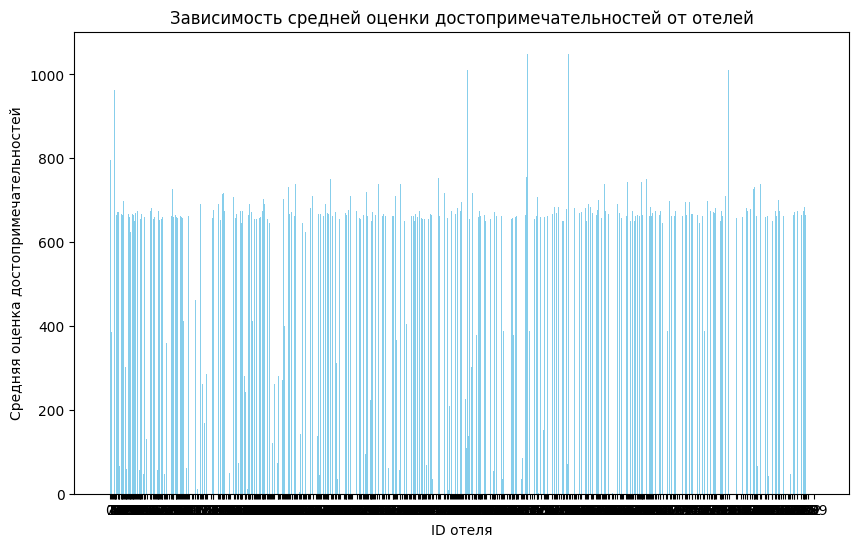

In [57]:
# Применение функции к каждому отелю
df_hotels_location['Средняя оценка достопр. поблизости'] = df_hotels_location.apply(get_average_dostoprim_rating, dostoprims_df=df_dostoprim_location, radius_km=5, axis=1)

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(df_hotels_location['id'], df_hotels_location['Средняя оценка'], color='skyblue')
plt.xlabel('ID отеля')
plt.ylabel('Средняя оценка достопримечательностей')
plt.title('Зависимость средней оценки достопримечательностей от отелей')
plt.xticks(df_hotels_location['id'])
plt.show()

In [58]:
df_hotels_location

,id,Адрес,Название отеля en,Общая оценка,Кол-во отзывов,Расположение,Номера,Цена/качество,Чистота,Обслуживание,...,Оснащенность номера,Типы номеров,Название_отеля,adress_for_scrap,Широта,Долгота,Количество достопримечательностей в радиусе (км),Список ID достопримечательностей,Средняя оценка,Средняя оценка достопр. поблизости
0,0,"Hudavendigar Cd. No:5, Стамбул 34110 Турция",Romance Istanbul Hotel,5.0,5163.0,5.0,4.9,4.9,4.9,5.0,...,"Гипоаллергенный номер, Звукоизоляция номеров, ...","Люкс для новобрачных, Номера для некурящих, Но...",1. Romance Istanbul Hotel,"Romance Istanbul Hotel, Istanbul, Turkiye",41.012661,28.977981,128,"[1, 2, 6, 8, 9, 13, 16, 17, 18, 19, 21, 25, 27...",655.382812,655.382812
1,1,"Saray Cd No: 5, Стамбул 34353 Турция",Conrad Istanbul Bosphorus,5.0,9369.0,4.5,4.5,4.4,4.7,4.7,...,"Гипоаллергенный номер, Шторы, блокирующие свет...","С видом на океан, С видом на город, Вид на кул...",2. Конрад Стамбул,"Conrad Istanbul Bosphorus, Istanbul, Turkiye",41.047134,29.009458,99,"[1, 2, 6, 16, 21, 23, 25, 31, 34, 36, 45, 52, ...",795.262626,795.262626
2,2,"Silahsor Cad. No 42, Стамбул 34381 Турция",Hilton Istanbul Bomonti Hotel & Conference Center,5.0,8565.0,4.3,4.8,4.6,4.8,4.7,...,"Гипоаллергенный номер, Шторы, блокирующие свет...","С видом на город, Люкс для новобрачных, Номера...",3. Хилтон Стамбул Бомонти Отель & Конференц-центр,Hilton Istanbul Bomonti Hotel & Conference Cen...,41.058787,28.979365,93,"[2, 4, 6, 9, 16, 17, 19, 21, 31, 34, 36, 45, 5...",386.612903,386.612903
4,4,"Ebusuud Cad. Mehmet Murat Sokak No: 4, Стамбул...",Hotel Sultania,5.0,5263.0,4.9,4.7,4.7,4.9,4.9,...,"Гипоаллергенный номер, Звукоизоляция номеров, ...","Люкс для новобрачных, Номера для некурящих, Но...",5. Отель Султания,"Hotel Sultania, Istanbul, Turkiye",41.012640,28.977555,128,"[1, 2, 6, 8, 9, 13, 16, 17, 18, 19, 20, 21, 25...",656.250000,656.250000
5,5,"Kaleci Sk. No:24 Küçük Ayasofya, Стамбул 34122...",Acacia Mansion Hotel,5.0,365.0,4.9,4.8,4.8,4.9,4.9,...,"Кондиционер, Уборка номеров, Имеются номера с ...","С видом на город, Номера для некурящих, Номера...",6. Acacia Mansion Hotel,"Acacia Mansion Hotel, Istanbul, Turkiye",41.003573,28.973132,124,"[1, 2, 6, 8, 9, 13, 16, 17, 18, 19, 20, 21, 25...",673.701613,673.701613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,Kucukayasofya Mah. Sehit Mehmet Pasa Sk. No:22...,Sultanahmet Cesme Hotel,4.5,296.0,4.8,4.2,4.4,4.5,4.5,...,"Кондиционер, Сейф, Мини-бар, ТВ с плоским экраном","Номера для некурящих, Номера-люксы, Семейные н...",888. Султанахмет Чешме Отель,"Sultanahmet Cesme Hotel, Istanbul, Turkiye",41.004284,28.972584,122,"[1, 2, 6, 8, 9, 13, 16, 17, 18, 19, 20, 21, 25...",684.081967,684.081967
888,888,"Kemeralti Caddesi No:37 Hacimimi Mahallesi, Ст...",Miller Hotel,4.5,41.0,4.9,4.2,4.9,4.2,4.5,...,"Кондиционер, Уборка номеров, Обслуживание номе...","Номера для некурящих, Номера-люксы, Семейные н...",889. Miller Hotel,"Miller Hotel, Istanbul, Turkiye",41.026334,28.979061,134,"[1, 2, 4, 6, 8, 9, 13, 16, 17, 18, 19, 21, 25,...",664.671642,664.671642
889,889,"Cankurtaran Mah. Mimar Mehmet Aga Cad. No:13, ...",Charm Hotel,4.0,189.0,4.7,4.0,4.2,4.4,4.3,...,"Кондиционер, Письменный стол, Сейф, Телефон, У...","Люкс для новобрачных, Номера для некурящих, Се...",890. Чарм Отель,"Charm Hotel, Istanbul, Turkiye",41.005055,28.979131,127,"[1, 2, 6, 8, 9, 13, 16, 17, 18, 19, 20, 21, 25...",661.283465,661.283465
892,892,"Yakuplu Cd. No:0140, Стамбул 34990 Турция",Mata Butik Hotel,4.0,65.0,4.8,4.7,4.5,5.0,4.6,...,"Звукоизоляция номеров, Кондиционер, Письменный...","Люкс для новобрачных, Семейные номера",893. Mata Butik Hotel,"Mata Butik Hotel, Istanbul, Turkiye",41.130059,29.844601,0,[],NaN,NaN


In [59]:
correlation = df_hotels_location['Кол-во отзывов'].corr(df_hotels_location['Средняя оценка достопр. поблизости'])
print(f'Коэффициент корреляции: {correlation}')

Коэффициент корреляции: 0.06923192826123686


In [48]:
df_dostoprim_location.to_csv('df_dostoprim_toBD.csv')
df_hotels_location.to_csv('df_hotels_toBD.csv')

In [60]:
# Нормируем в соотношении суммарных кол-во отзывов на кол-во достопримечательностей каждого типа
df_group['Нормированное количество отзывов'] = df_group['Суммарное_количество_отзывов']/ df_group['Количество'] 


/var/folders/ln/8qg4pnzx6b73bt0vg7fl4x780000gn/T/ipykernel_50199/307430320.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group['Нормированное количество отзывов'] = df_group['Суммарное_количество_отзывов']/ df_group['Количество']


In [129]:
df_group[df_group['Нормированное количество отзывов']>df_group['Нормированное количество отзывов'].quantile()]

,Тип достопримечательности,Количество,Суммарное_количество_отзывов,Нормированное количество отзывов
1,Блошиные и уличные рынки,21,13961.0,664.809524
5,Исторические достопримечательности,129,108998.0,844.945736
6,Кинотеатры,1,163.0,163.000000
7,Культурные объекты и достопримечательности,80,16442.0,205.525000
9,Океанариумы,3,1938.0,646.000000
11,Парки развлечений и тематические парки,11,1846.0,167.818182
13,Районы,21,23579.0,1122.809524
15,Специализированные музеи,60,6092.0,101.533333
17,Универмаги,4,403.0,100.750000


In [43]:
df_hotels_location

,id,Адрес,Название отеля en,Общая оценка,Кол-во отзывов,Расположение,Номера,Цена/качество,Чистота,Обслуживание,...,Оснащенность номера,Типы номеров,Название_отеля,Качество сна,adress_for_scrap,Широта,Долгота,Количество достопримечательностей в радиусе (км),Список ID достопримечательностей,Средняя оценка
0,0,"Hudavendigar Cd. No:5, Стамбул 34110 Турция",Romance Istanbul Hotel,5.0,5163.0,5.0,4.9,4.9,4.9,5.0,...,"Гипоаллергенный номер, Звукоизоляция номеров, ...","Люкс для новобрачных, Номера для некурящих, Но...",1. Romance Istanbul Hotel,NaN,"Romance Istanbul Hotel, Istanbul, Turkiye",41.012661,28.977981,128,"[1, 2, 6, 8, 9, 13, 16, 17, 18, 19, 21, 25, 27...",655.382812
1,1,"Saray Cd No: 5, Стамбул 34353 Турция",Conrad Istanbul Bosphorus,5.0,9369.0,4.5,4.5,4.4,4.7,4.7,...,"Гипоаллергенный номер, Шторы, блокирующие свет...","С видом на океан, С видом на город, Вид на кул...",2. Конрад Стамбул,NaN,"Conrad Istanbul Bosphorus, Istanbul, Turkiye",41.047134,29.009458,99,"[1, 2, 6, 16, 21, 23, 25, 31, 34, 36, 45, 52, ...",795.262626
2,2,"Silahsor Cad. No 42, Стамбул 34381 Турция",Hilton Istanbul Bomonti Hotel & Conference Center,5.0,8565.0,4.3,4.8,4.6,4.8,4.7,...,"Гипоаллергенный номер, Шторы, блокирующие свет...","С видом на город, Люкс для новобрачных, Номера...",3. Хилтон Стамбул Бомонти Отель & Конференц-центр,NaN,Hilton Istanbul Bomonti Hotel & Conference Cen...,41.058787,28.979365,93,"[2, 4, 6, 9, 16, 17, 19, 21, 31, 34, 36, 45, 5...",386.612903
4,4,"Ebusuud Cad. Mehmet Murat Sokak No: 4, Стамбул...",Hotel Sultania,5.0,5263.0,4.9,4.7,4.7,4.9,4.9,...,"Гипоаллергенный номер, Звукоизоляция номеров, ...","Люкс для новобрачных, Номера для некурящих, Но...",5. Отель Султания,NaN,"Hotel Sultania, Istanbul, Turkiye",41.012640,28.977555,128,"[1, 2, 6, 8, 9, 13, 16, 17, 18, 19, 20, 21, 25...",656.250000
5,5,"Kaleci Sk. No:24 Küçük Ayasofya, Стамбул 34122...",Acacia Mansion Hotel,5.0,365.0,4.9,4.8,4.8,4.9,4.9,...,"Кондиционер, Уборка номеров, Имеются номера с ...","С видом на город, Номера для некурящих, Номера...",6. Acacia Mansion Hotel,NaN,"Acacia Mansion Hotel, Istanbul, Turkiye",41.003573,28.973132,124,"[1, 2, 6, 8, 9, 13, 16, 17, 18, 19, 20, 21, 25...",673.701613
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,887,Kucukayasofya Mah. Sehit Mehmet Pasa Sk. No:22...,Sultanahmet Cesme Hotel,4.5,296.0,4.8,4.2,4.4,4.5,4.5,...,"Кондиционер, Сейф, Мини-бар, ТВ с плоским экраном","Номера для некурящих, Номера-люксы, Семейные н...",888. Султанахмет Чешме Отель,NaN,"Sultanahmet Cesme Hotel, Istanbul, Turkiye",41.004284,28.972584,122,"[1, 2, 6, 8, 9, 13, 16, 17, 18, 19, 20, 21, 25...",684.081967
888,888,"Kemeralti Caddesi No:37 Hacimimi Mahallesi, Ст...",Miller Hotel,4.5,41.0,4.9,4.2,4.9,4.2,4.5,...,"Кондиционер, Уборка номеров, Обслуживание номе...","Номера для некурящих, Номера-люксы, Семейные н...",889. Miller Hotel,NaN,"Miller Hotel, Istanbul, Turkiye",41.026334,28.979061,134,"[1, 2, 4, 6, 8, 9, 13, 16, 17, 18, 19, 21, 25,...",664.671642
889,889,"Cankurtaran Mah. Mimar Mehmet Aga Cad. No:13, ...",Charm Hotel,4.0,189.0,4.7,4.0,4.2,4.4,4.3,...,"Кондиционер, Письменный стол, Сейф, Телефон, У...","Люкс для новобрачных, Номера для некурящих, Се...",890. Чарм Отель,NaN,"Charm Hotel, Istanbul, Turkiye",41.005055,28.979131,127,"[1, 2, 6, 8, 9, 13, 16, 17, 18, 19, 20, 21, 25...",661.283465
892,892,"Yakuplu Cd. No:0140, Стамбул 34990 Турция",Mata Butik Hotel,4.0,65.0,4.8,4.7,4.5,5.0,4.6,...,"Звукоизоляция номеров, Кондиционер, Письменный...","Люкс для новобрачных, Семейные номера",893. Mata Butik Hotel,NaN,"Mata Butik Hotel, Istanbul, Turkiye",41.130059,29.844601,0,[],NaN


In [39]:
df_dostoprim['Тип достопримечательности'].value_counts()

Тип достопримечательности
Исторические достопримечательности            129
Торговые центры                               104
Культурные объекты и достопримечательности     80
Парки                                          73
Специализированные музеи                       60
Блошиные и уличные рынки                       21
Районы                                         21
Специализированные и сувенирные магазины       15
Парки развлечений и тематические парки         11
Универмаги                                      4
Зоопарки                                        4
Художественные галереи                          3
Океанариумы                                     3
Древние руины                                   2
Военные музеи                                   1
Кинотеатры                                      1
Антикварные магазины                            1
Национальные парки                              1
Природные и заповедные зоны                     1
Name: count, dtype: int6

In [40]:
# # df_dostoprim['Тип достопримечательности разметка'] = 
# # Пример разметки данных
# def categorize_type(type):
#     if ['Природные и заповедные зоны', 'Национальные парки'] in type:
#         return 'Парки'
#     elif ['Антикварные магазины', 'Специализированные и сувенирные магазины', 'Универмаги', 'Кинотеатры'] in type:
#         return 'Торговые центры'
#     elif ['Военные музеи', 'Древние руины']:
#         return 'Исторические достопримечательности'
#     elif ['Океанариумы', 'Художественные галереи', 'Зоопарки']:
#         return ''

# hotels['Категория стиля'] = hotels['Стиль отеля'].apply(categorize_style)
# df_dostoprim['Тип достопримечательности']

Название достопримечательности
Viasea Akvaryum                      3
Berol Antik                          2
Miniaturk                            2
Clock Tower Dolmabahce               2
Maglova Su Kemeri                    2
Zeyrek Sarnıcı                       2
Sehzade Mehmet Turbesi               2
Sultan I Abdulhamit Turbesi          2
Ahi Ahmet Celebi Cami                2
Seferaga Cesmesi                     2
Sivrikoz Cesmesi                     2
Cumhuriyet Cesmesi                   2
Horhor Cesmesi                       2
Kurkcubasi Haci Huseyin Aga Camii    2
Hamidiye Sebili                      2
March 16th Martyrs                   2
Simkeshane                           2
Kamondo House Ruins                  2
Ceneviz Sarayı                       2
Bahçeköy Sultan Mahmut Su Kemeri     2
Museum Of Illusions Istanbul         2
Cistern Art Gallery                  2
Mimar Sinan Bazaar                   2
Tomb of Hurrem Sultan                2
Serefiye Sarnici                 

/var/folders/ln/8qg4pnzx6b73bt0vg7fl4x780000gn/T/ipykernel_30254/3465073959.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels_df[['Nearby_Attraction_Count', 'Nearby_Attraction_IDs']] = hotels_df.apply(find_nearby_attractions, axis=1, result_type='expand')
/var/folders/ln/8qg4pnzx6b73bt0vg7fl4x780000gn/T/ipykernel_30254/3465073959.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotels_df[['Nearby_Attraction_Count', 'Nearby_Attraction_IDs']] = hotels_df.apply(find_nearby_attractions, axis=1, re

,id,Название отеля en,Nearby_Attraction_Count,Nearby_Attraction_IDs
0,0,Romance Istanbul Hotel,116,"[1, 2, 6, 8, 9, 13, 16, 17, 18, 19, 21, 25, 27..."
1,1,Conrad Istanbul Bosphorus,72,"[2, 6, 16, 21, 31, 34, 36, 45, 67, 83, 87, 134..."
2,2,Hilton Istanbul Bomonti Hotel & Conference Center,79,"[2, 6, 9, 16, 17, 21, 31, 34, 36, 45, 56, 59, ..."
4,4,Hotel Sultania,116,"[1, 2, 6, 8, 9, 13, 16, 17, 18, 19, 21, 25, 27..."
5,5,Acacia Mansion Hotel,106,"[1, 2, 6, 8, 9, 13, 16, 17, 18, 19, 21, 25, 27..."
...,...,...,...,...
887,887,Sultanahmet Cesme Hotel,106,"[1, 2, 6, 8, 9, 13, 16, 17, 18, 19, 21, 25, 27..."
888,888,Miller Hotel,123,"[1, 2, 6, 8, 9, 13, 16, 17, 18, 19, 21, 25, 27..."
889,889,Charm Hotel,111,"[1, 2, 6, 8, 9, 13, 16, 17, 18, 19, 21, 25, 27..."
892,892,Mata Butik Hotel,0,[]


In [61]:
df_hotels_temp = pd.read_csv('hotels_info_coord.csv').drop(columns=['Unnamed: 0'])
df_dostoprim_temp = pd.read_csv('dostoprim_info_coord.csv').drop(columns=['Unnamed: 0'])

In [69]:
df_dostoprim_location.to_csv('BD_dostoprim.csv', sep=';', index=False)
df_hotels_location.to_csv('BD_hotels.csv', sep=';', index=False)

In [65]:
df_hotels_temp

,id,Адрес,Название отеля en,Общая оценка,Кол-во отзывов,Расположение,Номера,Цена/качество,Чистота,Обслуживание,...,СТИЛЬ ОТЕЛЯ,"Языки, используемые в общении",Услуги и удобства в отеле,Оснащенность номера,Типы номеров,Название_отеля,Качество сна,adress_for_scrap,Широта,Долгота
0,0,"Hudavendigar Cd. No:5, Стамбул 34110 Турция",Romance Istanbul Hotel,"5,0",5163 отзыва,"5,0 из 5 кружков","4,9 из 5 кружков","4,9 из 5 кружков","4,9 из 5 кружков","5,0 из 5 кружков",...,"['Романтический', 'Очаровательный']","['Русский, Английский, Турецкий']","['Парковка', 'Бесплатный WiFi', 'Фитнес-центр'...","['Гипоаллергенный номер', 'Звукоизоляция номер...","['Люкс для новобрачных', 'Номера для некурящих...",1. Romance Istanbul Hotel,NaN,"Romance Istanbul Hotel, Istanbul, Turkiye",41.012661,28.977981
1,1,"Saray Cd No: 5, Стамбул 34353 Турция",Conrad Istanbul Bosphorus,"5,0",9369 отзывов,"4,5 из 5 кружков","4,5 из 5 кружков","4,4 из 5 кружков","4,7 из 5 кружков","4,7 из 5 кружков",...,"['Вид на город', 'С видом на гавань']","['Английский, Французский, Арабский, Немецкий ...",['Услуга парковки автомобиля сотрудником отеля...,"['Гипоаллергенный номер', 'Шторы, блокирующие ...","['С видом на океан', 'С видом на город', 'Вид ...",2. Конрад Стамбул,NaN,"Conrad Istanbul Bosphorus, Istanbul, Turkiye",41.047134,29.009458
2,2,"Silahsor Cad. No 42, Стамбул 34381 Турция",Hilton Istanbul Bomonti Hotel & Conference Center,"5,0",8565 отзывов,"4,3 из 5 кружков","4,8 из 5 кружков","4,6 из 5 кружков","4,8 из 5 кружков","4,7 из 5 кружков",...,"['Бизнес-класс', 'Вид на город']","['Русский, Английский, Французский, Испанский ...",['Услуга парковки автомобиля сотрудником отеля...,"['Гипоаллергенный номер', 'Шторы, блокирующие ...","['С видом на город', 'Люкс для новобрачных', '...",3. Хилтон Стамбул Бомонти Отель & Конференц-центр,NaN,Hilton Istanbul Bomonti Hotel & Conference Cen...,41.058787,28.979365
3,3,"Mimar Sinan Caddesi No: 35 G Tower, Стамбул 34...",The G Hotels Istanbul,"4,5",296 отзывов,"4,3 из 5 кружков","4,5 из 5 кружков","4,8 из 5 кружков","4,3 из 5 кружков","4,8 из 5 кружков",...,"['Вид на город', 'Бизнес-класс']","['Русский, Английский, Испанский, Арабский и е...","['Бесплатная парковка', 'Бесплатный WiFi', 'Фи...","['Купальные халаты', 'Кондиционер', 'Письменны...","['С видом на город', 'Люкс для новобрачных', '...",4. The G Hotels Istanbul,NaN,"The G Hotels Istanbul, Istanbul, Turkiye",NaN,NaN
4,4,"Ebusuud Cad. Mehmet Murat Sokak No: 4, Стамбул...",Hotel Sultania,"5,0",5263 отзыва,"4,9 из 5 кружков","4,7 из 5 кружков","4,7 из 5 кружков","4,9 из 5 кружков","4,9 из 5 кружков",...,"['Романтический', 'Расположение в центре']","['Русский, Английский, Французский, Арабский и...","['Платная частная парковка поблизости', 'Беспл...","['Гипоаллергенный номер', 'Звукоизоляция номер...","['Люкс для новобрачных', 'Номера для некурящих...",5. Отель Султания,NaN,"Hotel Sultania, Istanbul, Turkiye",41.012640,28.977555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,895,"Kucuk Ayasofya Mahallesi, Bardakci Sk. No:18, ...",Sofia Corner Hotel,"4,5",49 отзывов,"4,8 из 5 кружков","4,3 из 5 кружков","4,9 из 5 кружков","4,0 из 5 кружков","4,7 из 5 кружков",...,['С видом на океан'],"['Русский, Английский, Французский, Арабский и...","['Бесплатная частная парковка поблизости', 'Бе...","['Звукоизоляция номеров', 'Кондиционер', 'Убор...","['С видом на океан', 'С видом на город', 'Вид ...",896. Sofia Corner Hotel,NaN,"Sofia Corner Hotel, Istanbul, Turkiye",NaN,NaN
896,896,"Dolapdere Taksim Caddesi, Cambazoğlu Sk. No:6,...",Ten Rooms Istanbul,"4,5",56 отзывов,"4,8 из 5 кружков","4,8 из 5 кружков","4,8 из 5 кружков","4,8 из 5 кружков","4,6 из 5 кружков",...,"['Бюджетный', 'Современно']","['Русский, Английский, Французский, Испанский ...","['Платная частная парковка поблизости', 'Беспл...","['Шторы, блокирующие свет', 'Звукоизоляция ном...","['С видом на город', 'Номера для некурящих', '...",897. Ten Rooms Istanbul,NaN,"Ten Rooms Istanbul